### Data Fields
* datetime - hourly date + timestamp   
* season:
    -  1 = spring, 
    - 2 = summer, 
    - 3 = fall, 
    - 4 = winter  
* holiday - whether the day is considered a holiday 
* workingday - whether the day is neither a weekend nor holiday 
* weather:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
* temp - temperature in Celsius 
* atemp - "feels like" temperature in Celsius 
* humidity - relative humidity 
* windspeed - wind speed 
* casual - number of non-registered user rentals initiated 
* registered - number of registered user rentals initiated 
* count - number of total rentals 

#### Imports 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

sns.set()

#### Data imports

In [22]:
df = pd.read_csv('../data/train.csv')

#### Dataframe structure analysis

In [23]:
display(df.head(), df.describe(), df.info(), df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


None

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- 0 Humidity ?
- 0 Windspeed ? (Finally not an error)
- Remove registered
- Remove casual

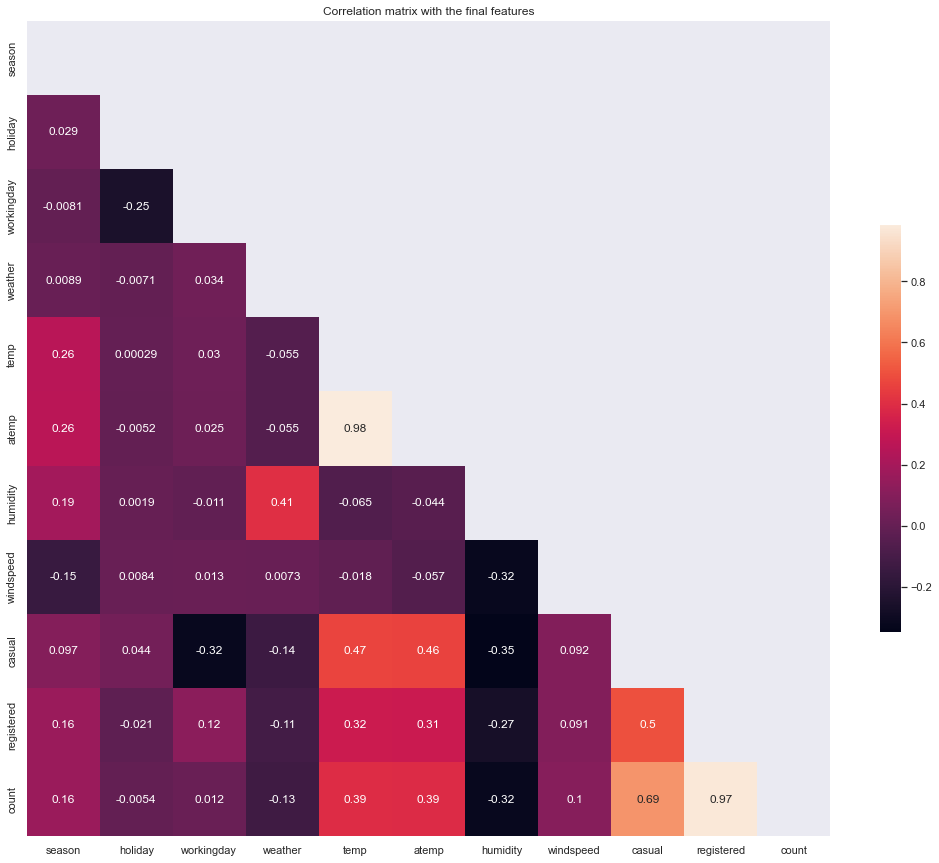

In [24]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
plt.figure(figsize=(18,15))
sns.heatmap(cor, annot=True, cbar_kws={'shrink':0.5}, mask=mask).set_title('Correlation matrix with the final features')
plt.show()

- atemp and temp are too correlated

In [25]:
df[df['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132


Not an error

In [26]:
df[df['humidity'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


Impossible but for now i don't touch this 

#### Date encoding : 
- Get an int for date (number of day since the first day)
- Separate hours

In [27]:
df['datetime'] = pd.to_datetime(df['datetime'])
df["date"] = (df["datetime"] - df["datetime"].min()).dt.days
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

I tried to make a feature for each years, months, days, but it's less relevant than the day number itself

In [28]:
# NOT USED
# df['years']=pd.DatetimeIndex(df['datetime']).year
# df['months']=pd.DatetimeIndex(df['datetime']).month
# df['days']=pd.DatetimeIndex(df['datetime']).day
df['hours']=pd.DatetimeIndex(df['datetime']).hour

Quick Analysis of the dataset with hist plot

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'hours'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

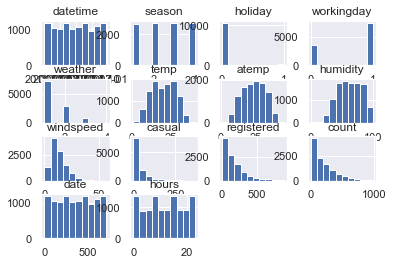

In [29]:
df.hist()

Text(0.5, 1.0, 'Count mean by hours')

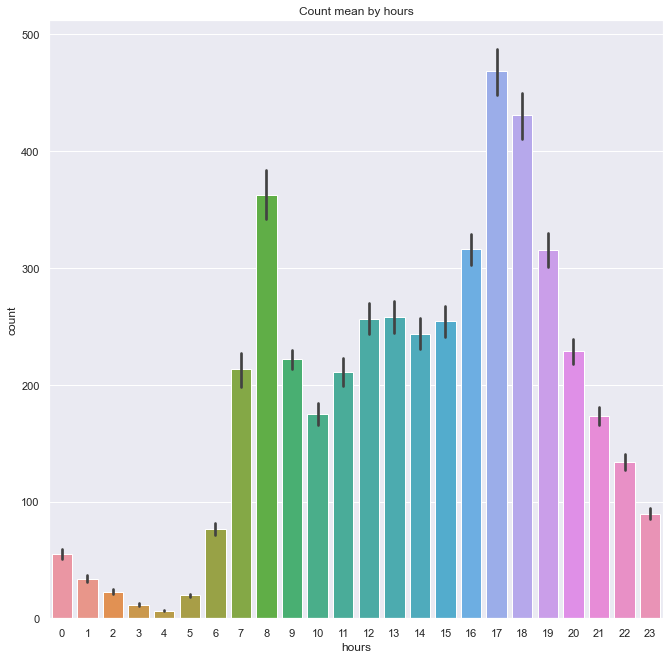

In [30]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.barplot(x="hours", y="count", data=df).set_title('Count mean by hours')

Text(0.5, 1.0, 'Count mean by temps')

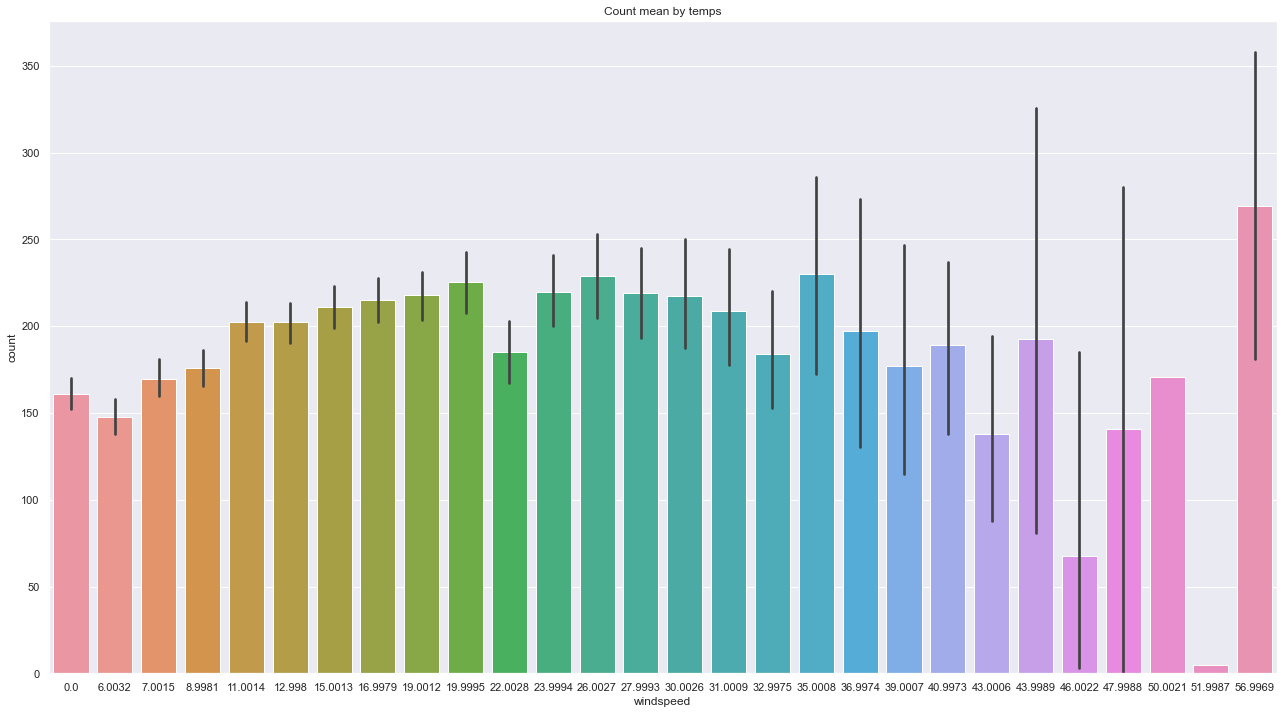

In [31]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="windspeed", y="count", data=df).set_title('Count mean by temps')

I tried to compute the humidex (Indice de confort) but it was too correlated to temp to be relevant

In [32]:
# NOT USED
# calcul du point de rosée  (formule de Heinrich Gustav Magnus-Tetens)
# df['alpha'] = np.log(df['humidity'] / 100.0) + (17.27 * df['atemp']) / (237.3 + df['atemp'])
# df['rosee'] = (237.3 * df['alpha']) / (17.27 - df['alpha'])

#calcul de l'humidex 
# df['humidex'] = df['atemp'] + 0.5555 * (6.11 * np.exp(5417.753 * (1 / 273.16 - 1 / (273.15 + df['rosee']))) - 10)

Dropping Casual, registered, atemp (atemp because the score is better with temp)

In [33]:
df = df.drop(['casual', 'registered', 'atemp'], axis=1)

#### Checking correlation after modification

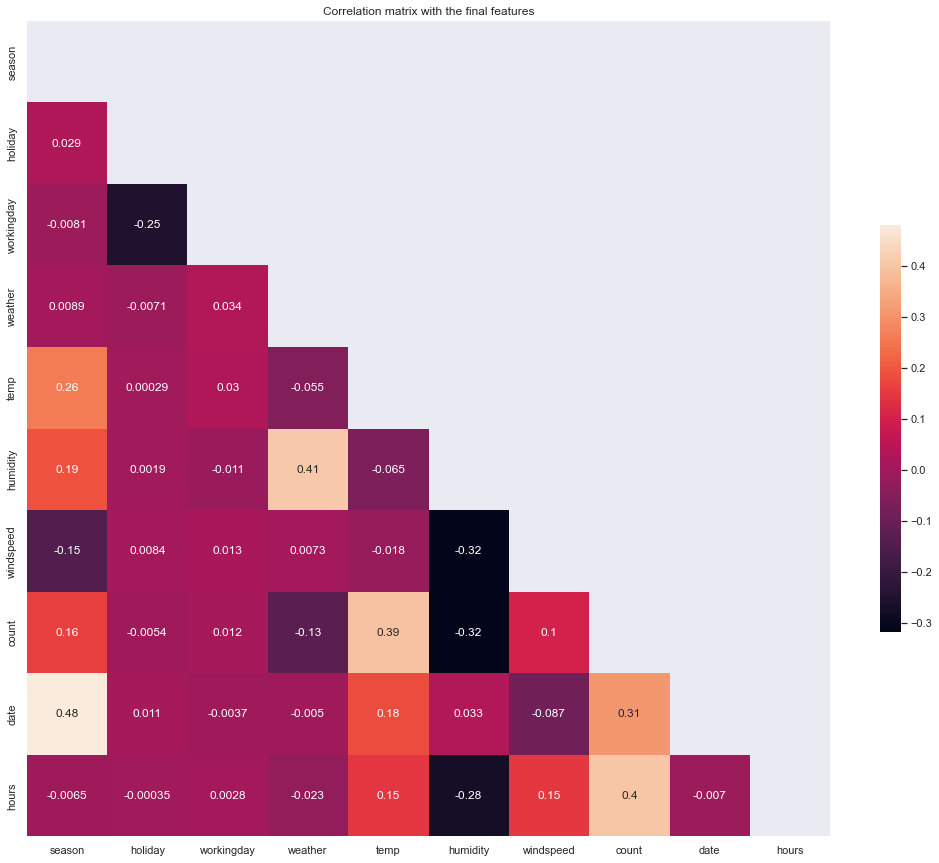

In [34]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
plt.figure(figsize=(18,15))
sns.heatmap(cor, annot=True, cbar_kws={'shrink':0.5}, mask=mask).set_title('Correlation matrix with the final features')
plt.show()

#### Splitting train / test by date  (2011 : 2012-08)

In [35]:
train_df = df[df['datetime'] <= '2012-08-01']
test_df = df[df['datetime'] >= '2012-08-01']

In [36]:
train_df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,date,hours
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,16,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,40,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,32,0,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,13,0,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...
8603,2012-07-19 20:00:00,3,0,1,1,33.62,49,11.0014,505,565,20
8604,2012-07-19 21:00:00,3,0,1,3,27.06,89,16.9979,332,565,21
8605,2012-07-19 22:00:00,3,0,1,3,27.06,89,16.9979,68,565,22
8606,2012-07-19 23:00:00,3,0,1,3,27.06,89,15.0013,65,565,23


In [37]:
test_df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,date,hours
8607,2012-08-01 00:00:00,3,0,1,1,27.88,79,11.0014,47,578,0
8608,2012-08-01 01:00:00,3,0,1,1,27.06,83,6.0032,33,578,1
8609,2012-08-01 02:00:00,3,0,1,1,26.24,83,7.0015,13,578,2
8610,2012-08-01 03:00:00,3,0,1,1,26.24,83,7.0015,7,578,3
8611,2012-08-01 04:00:00,3,0,1,2,26.24,78,8.9981,4,578,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336,718,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241,718,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168,718,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,129,718,22


Dropping datetime original column

In [38]:
train_df = train_df.drop('datetime', axis=1)
test_df = test_df.drop('datetime', axis=1)

#### Export to csv

In [39]:
train_df.to_csv('../data/cleaned_train.csv', index=False)
test_df.to_csv('../data/cleaned_test.csv', index=False)